In [ ]:
import numpy as numpy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import scienceplots
import torch


base_path = "../data/cd/"
file_name = "cd_{}_{}_{}.pt"


model_list = ['Llama-2-7b-hf', 'phi-2', 'Mistral-7B-v0.1', 'Baichuan-7B', 'Qwen2.5-7B'] 
dataset_list = ['c4', 'oscar', 'redpajama', 'pile', 'gsm8k', 'svamp', 'mawps', 'anli_r1', 'esnli', 'rte', 'boolq', 'commonsense_qa', 'race',
                'winogrande', 'wmt14', 'iwslt', 'opc', 'ds1000', 'mbpp']
distance_list = ['mean', 'flatten']


general_datasets = ['c4', 'oscar', 'redpajama', 'pile']
aritm_reasoning = ['gsm8k', 'svamp', 'mawps']
nlu_inference = ['anli_r1', 'esnli', 'rte']
commonsense_qa = ['boolq', 'commonsense_qa', 'race', 'winogrande']
translation = ['wmt14', 'iwslt']
coding = ['opc', 'ds1000', 'mbpp']
mixed = ['c4', 'gsm8k', 'anli_r1', 'boolq', 'wmt14']

all_categories = [general_datasets, aritm_reasoning, nlu_inference, commonsense_qa, translation, coding]
all_categories_names = ['general_datasets', 'aritm_reasoning', 'nlu_inference', 'commonsense_qa', 'translation', 'coding']

dictionary_id_name = {key: value for key, value in zip(dataset_list, range(len(dataset_list)))}
dictionary_name_id = {key: value for key, value in zip(range(len(dataset_list)), dataset_list)}
dictionary_id_group = {key: value for key, value in zip(range(len(all_categories_names)), all_categories_names)}


dictionary_dataset_to_category = {dataset: category for category, datasets in zip(all_categories_names, all_categories) for dataset in datasets}


all_categories_names_print = ['Language Modeling', 'Mathematical Reasoning', 'NLI', 'Question Answering', 'Translation', 'Coding']
models_names_print = ['Llama', 'Phi', 'Mistral', 'Baichuan', 'Qwen']

rename_dictionary = {all_categories_names[i]: all_categories_names_print[i] for i in range(len(all_categories_names))} 
rename_dictionary_model_names = {model_list[i]: models_names_print[i] for i in range(len(model_list))}
rename_dictionary_distance = {'mean': 'Mean', 'flatten': 'Flatten'}

dataset_list_print = ['C4', 'OSCAR', 'RedPajama', 'WikiText', 'Pile', 'GSM8K', 'SVAMP', 'MAWPS', 'ANLI', 'e-SNLI', 'RTE', 'BoolQ', 'CommonsenseQA', 'RACE', 'WinoGrande', 'WMT14', 'IWSLT', 'RefineCode', 'DS1000', 'MBPP']
rename_dictionary_dataset = {dataset_list[i]: dataset_list_print[i] for i in range(len(dataset_list))}

plt.style.use('science')

sns.set_context("notebook", rc={
    "axes.linewidth": 0.5,
    "axes.titlesize": 22,
    "axes.labelsize": 18,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
})

In [2]:
#Create a custom color palette for the plot

original_cmap = sns.color_palette("Spectral_r", as_cmap=True) 
colors = np.concatenate((original_cmap(np.linspace(0, 0.35, 4)), original_cmap(np.linspace(0.7, 1, 4))), axis=0) # Extract 10 colors
custom_palette = np.clip(colors, 0, 1) # Ensure valid RGB range
custom_palette = [tuple(c) for c in custom_palette]  # Convert array to list of 


palette_heatmap =  sns.color_palette("Blues", as_cmap=True) 
colors_blues = np.concatenate((palette_heatmap(np.linspace(0, 0.35, 1)), palette_heatmap(np.linspace(0.8, 1, 10))), axis=0) # Extract 10 colors
custom_blues = np.clip(colors_blues, 0, 1) # Ensure valid RGB range
custom_blues = [tuple(c) for c in custom_blues]  # Convert array to list of 

one_color = sns.color_palette("mako", as_cmap=True).colors[190]

In [3]:
"""results = pd.DataFrame()

for model in model_list:
    for dataset in dataset_list:
        print(f"Processing {model} on {dataset}")
        dataframe_model_dataset = pd.DataFrame()
        
        path = base_path + file_name.format(model, dataset)
        data = torch.load(path)
        
        data_array = []
        i_array = []
        j_array = []
        
        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                data_array.append(data[i][j].item())
                i_array.append(i)
                j_array.append(j)
            
        dataframe_model_dataset["value"] = data_array
        dataframe_model_dataset["i"] = i_array
        dataframe_model_dataset["j"] = j_array
        dataframe_model_dataset["model"] = model
        dataframe_model_dataset["dataset"] = dataset
        
        results = pd.concat([results, dataframe_model_dataset], ignore_index=True)
        
print(results)
"""

'results = pd.DataFrame()\n\nfor model in model_list:\n    for dataset in dataset_list:\n        print(f"Processing {model} on {dataset}")\n        dataframe_model_dataset = pd.DataFrame()\n        \n        path = base_path + file_name.format(model, dataset)\n        data = torch.load(path)\n        \n        data_array = []\n        i_array = []\n        j_array = []\n        \n        for i in range(data.shape[0]):\n            for j in range(data.shape[1]):\n                data_array.append(data[i][j].item())\n                i_array.append(i)\n                j_array.append(j)\n            \n        dataframe_model_dataset["value"] = data_array\n        dataframe_model_dataset["i"] = i_array\n        dataframe_model_dataset["j"] = j_array\n        dataframe_model_dataset["model"] = model\n        dataframe_model_dataset["dataset"] = dataset\n        \n        results = pd.concat([results, dataframe_model_dataset], ignore_index=True)\n        \nprint(results)\n'

In [4]:
results_mean = pd.DataFrame()

for model in model_list:
    for dataset in dataset_list:
        for distance in distance_list:
            dataframe_model_dataset = pd.DataFrame()
            
            path = base_path + file_name.format(model, dataset, distance)
            data = torch.load(path)
            
            data_mean = torch.mean(data, dim=0)
            sorted_data, index_sort = torch.sort(data_mean, descending=False)
            
            data_array = []
            i_array = []
            
            for i in range(sorted_data.shape[0]):
                data_array.append(sorted_data[i].item())
                i_array.append(i)
                
            dataframe_model_dataset["value"] = data_array
            dataframe_model_dataset["i"] = i_array
            dataframe_model_dataset["model"] = model
            dataframe_model_dataset["dataset"] = dataset
            dataframe_model_dataset["distance"] = distance
        
            results_mean = pd.concat([results_mean, dataframe_model_dataset], ignore_index=True)


results_mean["model"] = results_mean["model"].replace(rename_dictionary_model_names)
results_mean["distance"] = results_mean["distance"].replace(rename_dictionary_distance)

results_mean['dataset'] = results_mean['dataset'].replace(rename_dictionary_dataset)
results_mean['dataset'] = results_mean['dataset'].replace({'dense': 'Dense'})


/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_5311/2201826231.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results_plot, x="model", y="value", color=one_color, ax=ax[1], palette=custom_palette)
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_5311/2201826231.py:10: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.boxplot(data=results_plot, x="model", y="value", color=one_color, ax=ax[1], palette=custom_palette)
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_5311/2201826231.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results_plot, x="dataset", y="value", ax=ax[2], palette=custom_

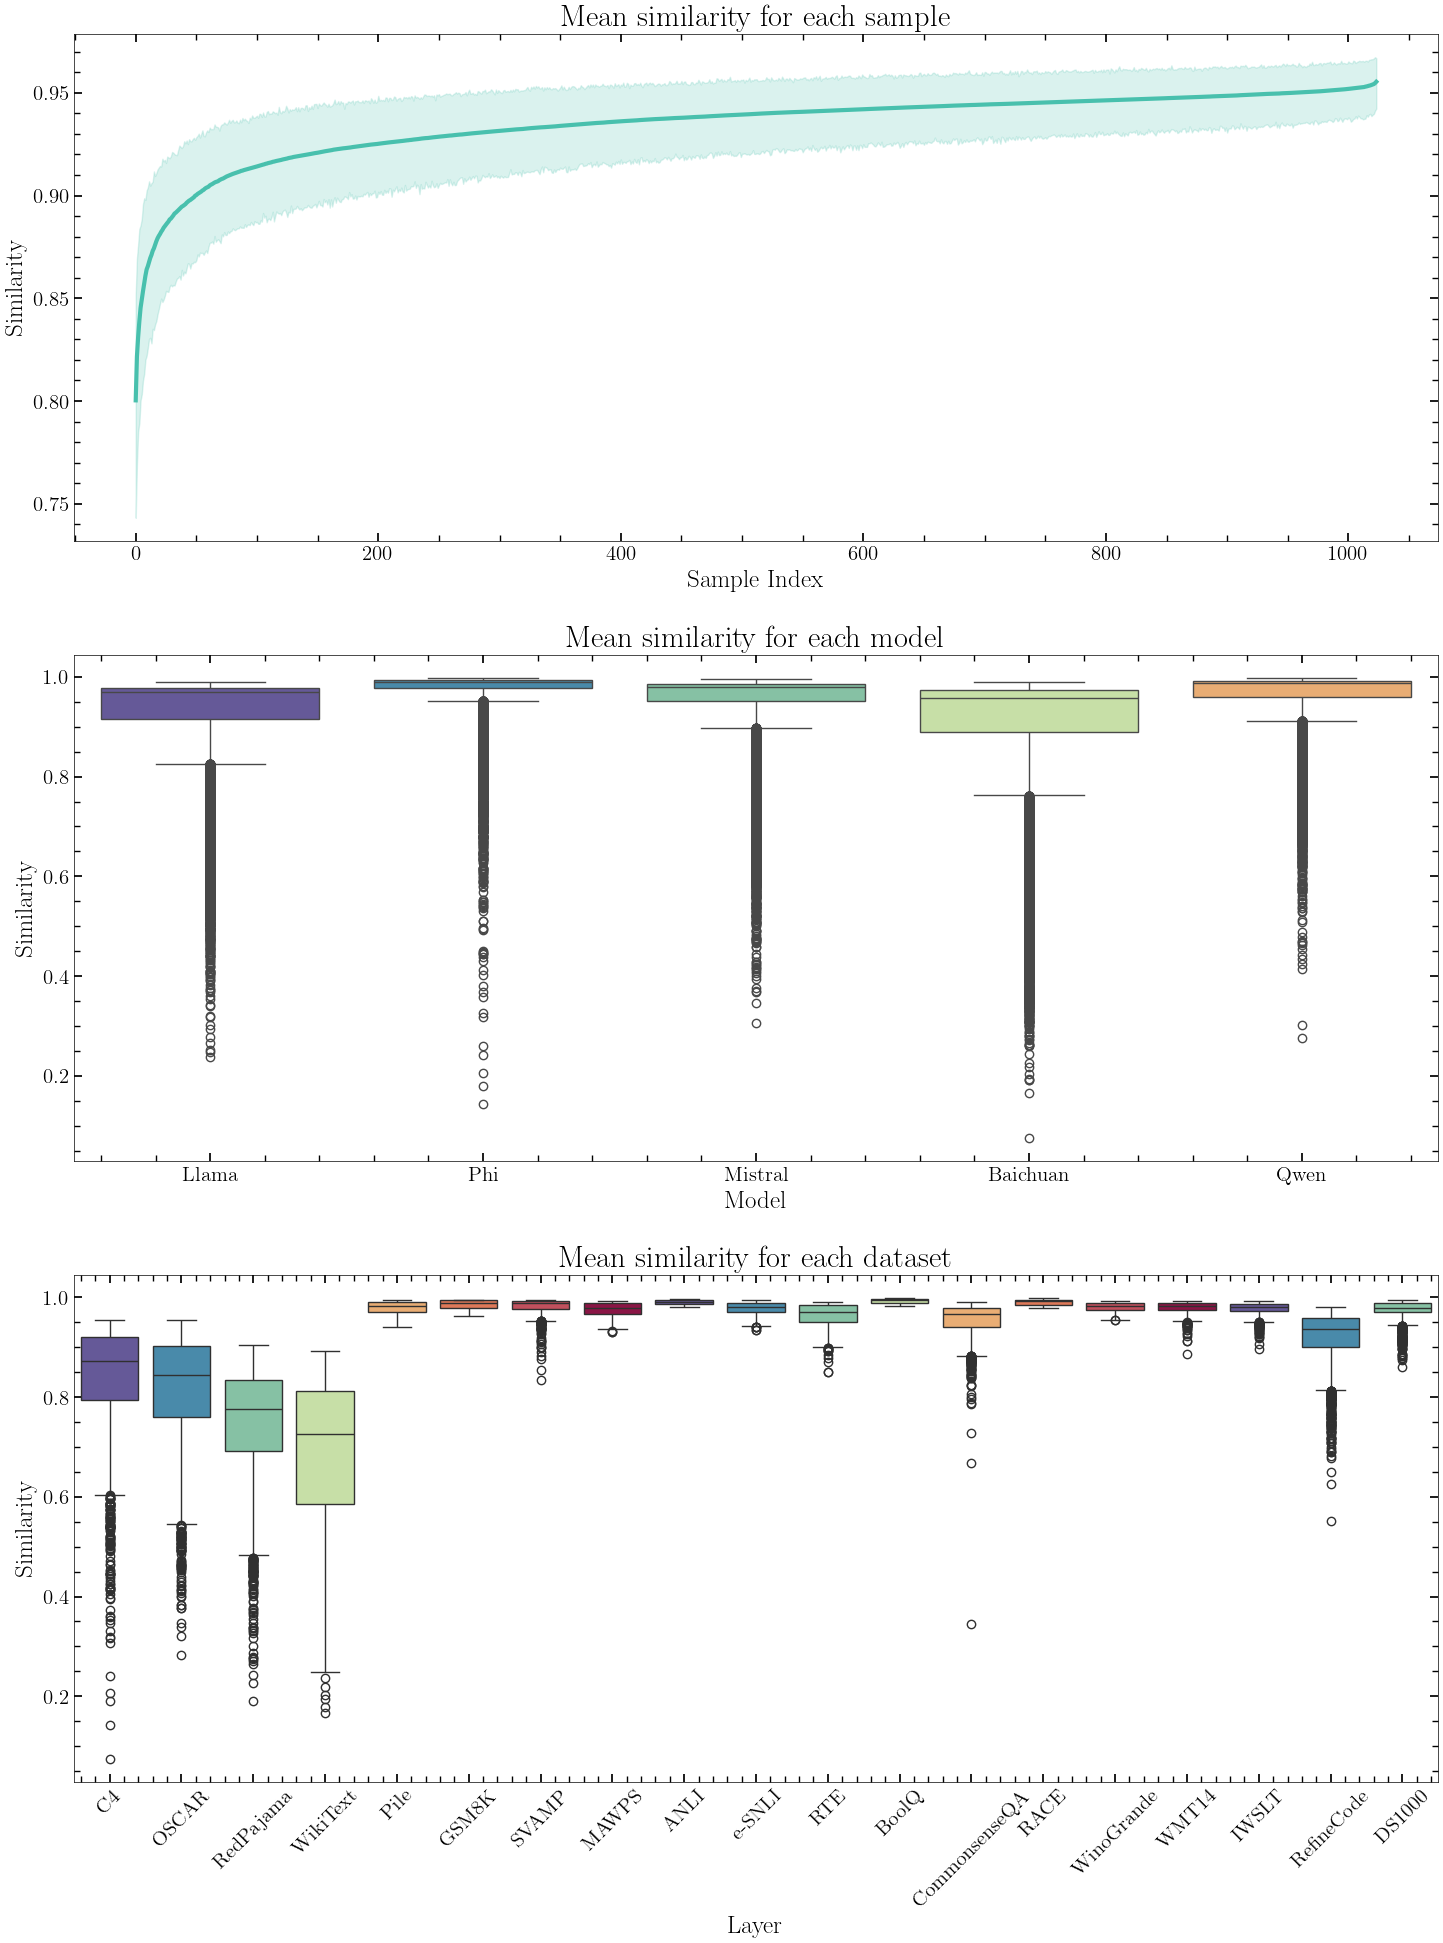

In [5]:
figure, ax = plt.subplots(3, figsize=(15, 20))
results_plot = results_mean[results_mean['distance'] == 'Mean']

sns.lineplot(data=results_plot, x="i", y="value", color=one_color, ax=ax[0], linewidth=3)
ax[0].set_title("Mean similarity for each sample")
ax[0].set_ylabel("Similarity")
ax[0].set_xlabel("Sample Index")


sns.boxplot(data=results_plot, x="model", y="value", color=one_color, ax=ax[1], palette=custom_palette)
ax[1].set_title("Mean similarity for each model")
ax[1].set_ylabel("Similarity")
ax[1].set_xlabel("Model")

sns.boxplot(data=results_plot, x="dataset", y="value", ax=ax[2], palette=custom_palette)
ax[2].set_title("Mean similarity for each dataset")
ax[2].set_ylabel("Similarity")
ax[2].set_xlabel("Layer")
ax[2].tick_params(axis='x', rotation=45)


#figure.suptitle("Cosine similarity using the mean over sequence length", fontsize=25)
figure.tight_layout(pad=2.0)

/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_5311/3449766341.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results_plot, x="model", y="value", color=one_color, ax=ax[1], palette=custom_palette)
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_5311/3449766341.py:10: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.boxplot(data=results_plot, x="model", y="value", color=one_color, ax=ax[1], palette=custom_palette)
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_5311/3449766341.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results_plot, x="dataset", y="value", ax=ax[2], palette=custom_

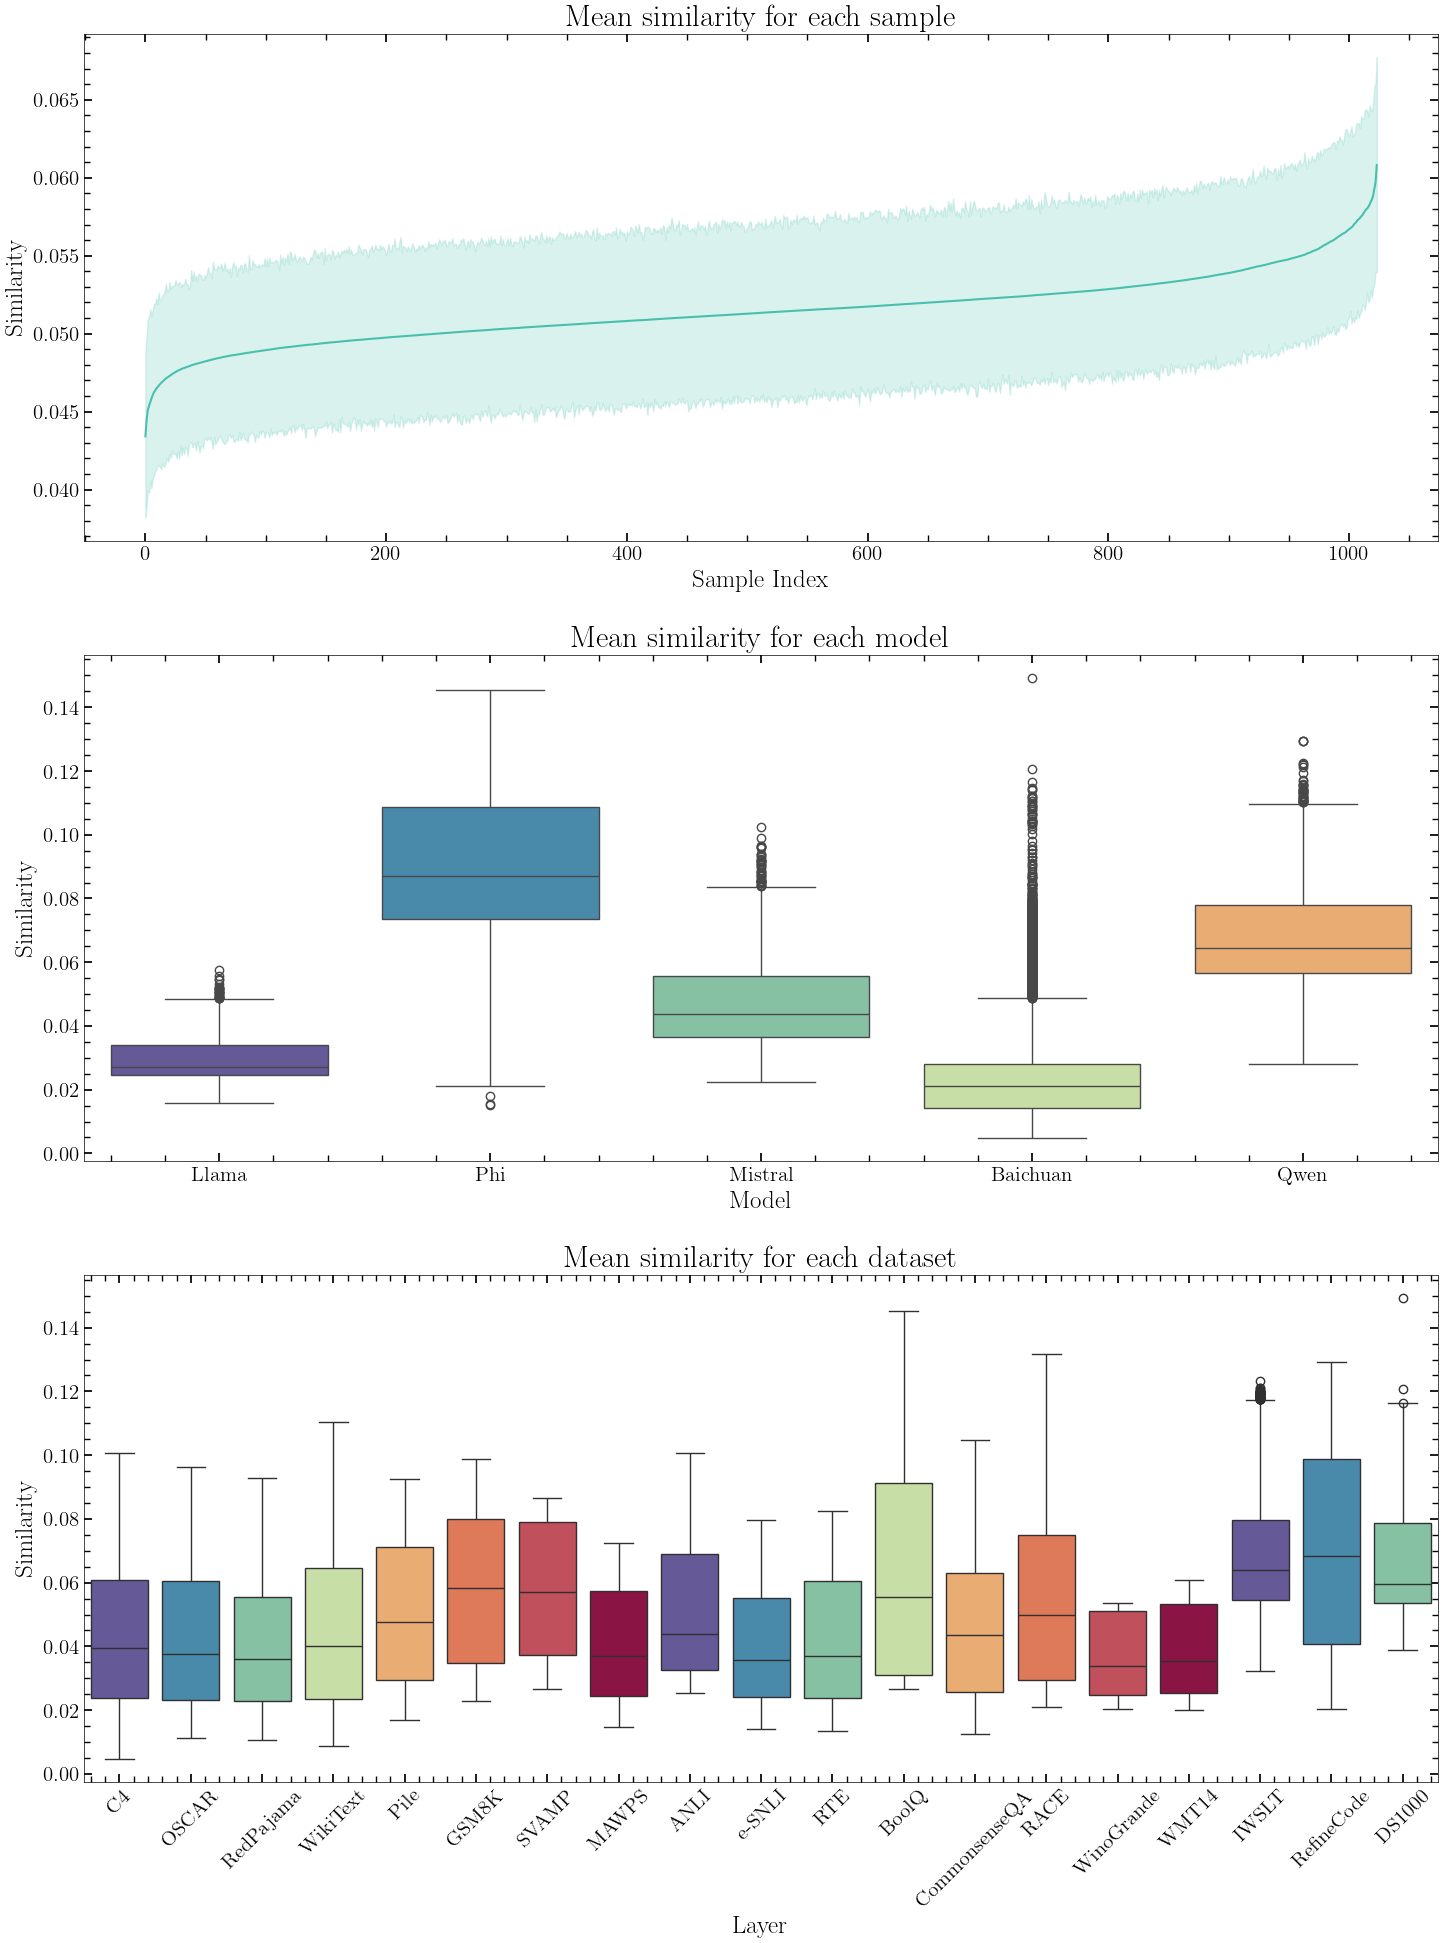

In [6]:
figure, ax = plt.subplots(3, figsize=(15, 20))
results_plot = results_mean[results_mean['distance'] == 'Flatten']

sns.lineplot(data=results_plot, x="i", y="value", color=one_color, ax=ax[0])
ax[0].set_title("Mean similarity for each sample")
ax[0].set_ylabel("Similarity")
ax[0].set_xlabel("Sample Index")


sns.boxplot(data=results_plot, x="model", y="value", color=one_color, ax=ax[1], palette=custom_palette)
ax[1].set_title("Mean similarity for each model")
ax[1].set_ylabel("Similarity")
ax[1].set_xlabel("Model")

sns.boxplot(data=results_plot, x="dataset", y="value", ax=ax[2], palette=custom_palette)
ax[2].set_title("Mean similarity for each dataset")
ax[2].set_ylabel("Similarity")
ax[2].set_xlabel("Layer")
ax[2].tick_params(axis='x', rotation=45)


#figure.suptitle("Cosine similarity using flatten over sequence length", fontsize=25)
figure.tight_layout(pad=2.0)

             model     size     type
0    Llama-2-7b-hf     4096     Mean
1    Llama-2-7b-hf  8388608  Flatten
2            phi-2     2560     Mean
3            phi-2  5242880  Flatten
4  Mistral-7B-v0.1     4096     Mean
5  Mistral-7B-v0.1  8388608  Flatten
6      Baichuan-7B     4096     Mean
7      Baichuan-7B  8388608  Flatten
8       Qwen2.5-7B     3582     Mean
9       Qwen2.5-7B  7335936  Flatten


/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_5311/1208466634.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=results_mean, x="distance", y="value", ax=ax[0], palette=custom_palette[1:])
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_5311/1208466634.py:12: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.boxplot(data=results_mean, x="distance", y="value", ax=ax[0], palette=custom_palette[1:])
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_5311/1208466634.py:17: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.lineplot(data=data_dimensions_embedding, x="model", y="size", hue="type", color=one_color, ax=ax[1], marker="o", palette=custom_palette[1:], linewidth=3, markersize=9)


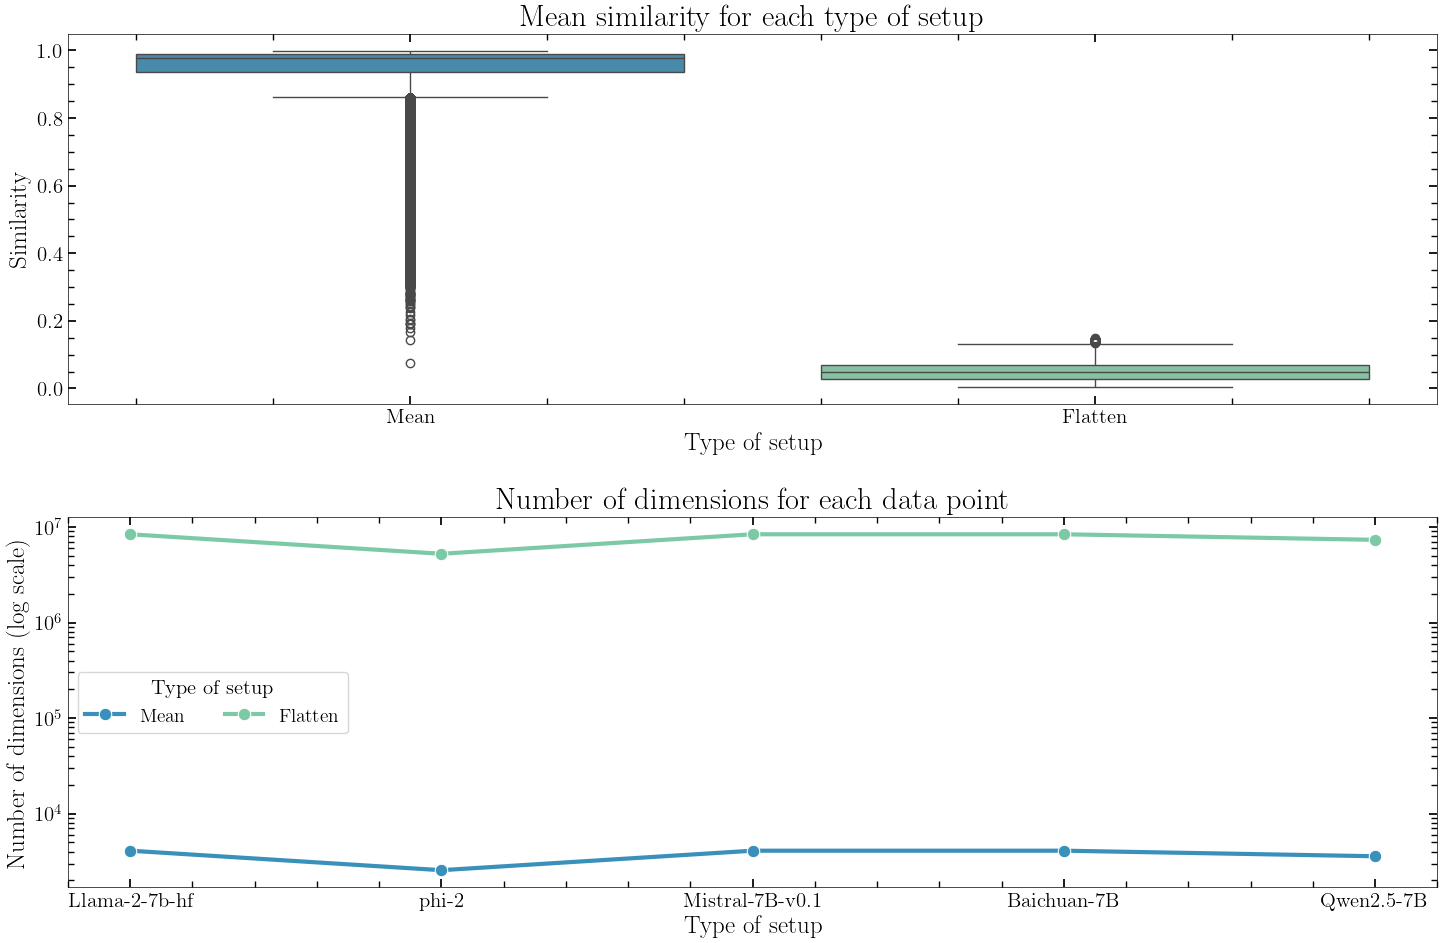

In [7]:
figure, ax = plt.subplots(2, figsize=(15, 10))

sqlen = 2048
data_dimensions_embedding = pd.DataFrame({
    "model": ['Llama-2-7b-hf', 'Llama-2-7b-hf', 'phi-2', 'phi-2', 'Mistral-7B-v0.1', 'Mistral-7B-v0.1', 'Baichuan-7B', 'Baichuan-7B', 'Qwen2.5-7B', 'Qwen2.5-7B'],
    "size": [4096, 4096*sqlen, 2560, 2560*sqlen, 4096, 4096*sqlen, 4096, 4096*sqlen, 3582, 3582*sqlen],
    "type": ["Mean", "Flatten"]*5
})

print(data_dimensions_embedding)

sns.boxplot(data=results_mean, x="distance", y="value", ax=ax[0], palette=custom_palette[1:])
ax[0].set_title("Mean similarity for each type of setup")
ax[0].set_ylabel("Similarity")
ax[0].set_xlabel("Type of setup")

sns.lineplot(data=data_dimensions_embedding, x="model", y="size", hue="type", color=one_color, ax=ax[1], marker="o", palette=custom_palette[1:], linewidth=3, markersize=9)
ax[1].set_yscale('log')
ax[1].set_title("Number of dimensions for each data point")
ax[1].set_ylabel("Number of dimensions (log scale)")
ax[1].set_xlabel("Type of setup")
ax[1].legend(title="Type of setup", loc='center left', title_fontsize=15, fontsize=14, ncol=2, frameon=True)


#figure.suptitle("Comparsion between the cosine similairty using flatten or mean", fontsize=25)
figure.tight_layout(pad=2.0)

